In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv("vehicle_data.csv")

C:\Users\Nidula\AppData\Local\Temp\ipykernel_21556\3325042007.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("vehicle_data.csv")


In [3]:
df.head()

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur...","Rs 12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km","Kurunegala City, Kurunegala",HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...,Prasad Enterprises,Premium-Member,2022-09-01 14:45:00
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku...","Rs 16,250,000",Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km","Kurunegala City, Kurunegala",1st owner(registered owner)Diesel(13-14km per ...,https://ikman.lk/en/ad/jaguar-xf-fully-loaded-...,Dhanushka Dharmasri,Member,2022-09-28 10:23:00
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo","Rs 17,000,000",Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km","Colombo 7, Colombo",2020 Facelift modelFirst owner (No previous ow...,https://ikman.lk/en/ad/toyota-chr-gt-new-face-...,Carzone Lanka,Member,2022-09-16 13:16:00
3,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo","Rs 13,000,000",Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","21,000 km","Colombo 7, Colombo",Toyota CHR GT Turbo1st owner Imported as a bra...,https://ikman.lk/en/ad/toyota-chr-toyato-2017-...,Carzone Lanka,Member,2022-09-30 10:12:00
4,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha","Rs 33,500,000",Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","57,000 km","Kelaniya, Gampaha",Toyota Land Cruiser Prado 20152 nd Owner for 5...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,Shine Music Center,Member,2022-09-30 21:50:00


In [4]:
df.nunique()

Title              43855
Sub_title         116785
Price               5318
Brand                123
Model               8506
Edition            15260
Year                  89
Condition              5
Transmission          21
Body                  22
Fuel                   9
Capacity            1874
Mileage            17339
Location             328
Description        50290
Post_URL          115682
Seller_name        36153
Seller_type            2
published_date     83779
dtype: int64

In [5]:
df.isnull().sum()

Title                 0
Sub_title             0
Price                 0
Brand                 0
Model                 1
Edition           76433
Year                  0
Condition             0
Transmission          1
Body               5095
Fuel                  0
Capacity            205
Mileage               0
Location              0
Description       16174
Post_URL              0
Seller_name          98
Seller_type           0
published_date        0
dtype: int64

In [6]:
# Extract Numeric Columns
def extract_num(row):
    amount = ""
    for w in str(row):
        if w.isnumeric():
            amount += w
    if amount == "":
        return None
    return int(amount)
    
df["Price"] = df["Price"].apply(extract_num)
df["Mileage"] = df["Mileage"].apply(extract_num)
df["Capacity"] = df["Capacity"].apply(extract_num)

df = df.rename({"Price":"Price (Rs)", "Mileage":"Mileage (km)", "Capacity": "Capacity (cc)"}, axis=1)

In [7]:
df.describe()

,Price (Rs),Year,Capacity (cc),Mileage (km)
count,1.184560e+05,123971.000000,1.192090e+05,1.182830e+05
mean,6.506624e+06,2008.409765,1.677523e+04,3.647962e+05
std,1.043430e+07,25.330835,2.733244e+06,1.950841e+07
min,8.500000e+01,0.000000,0.000000e+00,0.000000e+00
25%,1.275000e+06,2004.000000,6.500000e+02,3.595800e+04
50%,4.000000e+06,2013.000000,1.300000e+03,7.100000e+04
75%,7.500000e+06,2016.000000,1.600000e+03,1.223000e+05
max,7.750256e+08,2561.000000,7.010178e+08,4.596363e+09


In [8]:
df["District"] = df["Location"].apply(lambda x : x.split(", ")[-1])

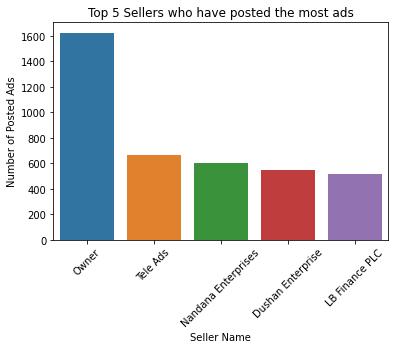

In [9]:
top_10_seller = df[["Title", "Seller_name"]].groupby("Seller_name").agg(['count'])['Title']['count'].sort_values(ascending=False)[:5]
fig = sns.barplot( x = top_10_seller.index, y = top_10_seller.values)
fig.set_xticklabels(labels=top_10_seller.index , rotation=45)
fig.set_ylabel("Number of Posted Ads")
fig.set_xlabel("Seller Name")
fig.set_title("Top 5 Sellers who have posted the most ads");

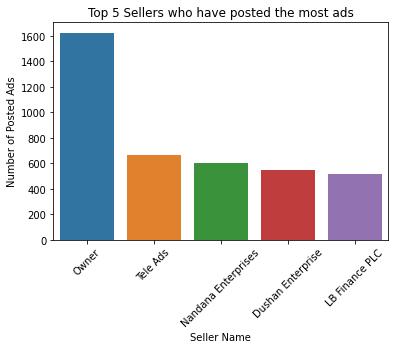

In [10]:
top_10_seller = df[["Title", "Seller_name"]].groupby("Seller_name").agg(['count'])['Title']['count'].sort_values(ascending=False)[:5]
fig = sns.barplot( x = top_10_seller.index, y = top_10_seller.values)
fig.set_xticklabels(labels=top_10_seller.index , rotation=45)
fig.set_ylabel("Number of Posted Ads")
fig.set_xlabel("Seller Name")
fig.set_title("Top 5 Sellers who have posted the most ads");

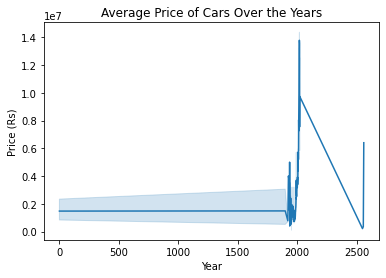

In [11]:
fig = sns.lineplot(data = df, x = "Year", y = "Price (Rs)")
fig.set_title("Average Price of Cars Over the Years"); 

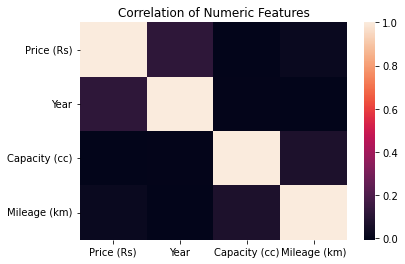

In [12]:
fig = sns.heatmap(df.corr())
fig.set_title("Correlation of Numeric Features");

In [ ]:
sns.pairplot(df)

In [ ]:
### 3D plot for Capacity.

fig = Figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df["Year"], df["Capacity (cc)"], df["Price (Rs)"], c=df["Price (Rs)"])
ax.set_xlabel("Year")
ax.set_ylabel("Capacity (cc)")
ax.set_zlabel("Price (Rs)");